# **UEFA EURO**

---

**NOTEBOOK 2: UEFA EURO MACHINE LEARNING MODEL**

---

**AUTHOR**

---

- Elmander

**TABLE OF CONTENT**

---

1.   STEP 1: MACHINE LEARNING.

     STEP 1 - PHASE 1: Train Model.

     STEP 1 - PHASE 2: Manage Oversampling.

     STEP 1 - PHASE 3: Peform GridSearch.

     STEP 1 - PHASE 4: Peform Cross-Validation.

     STEP 1 - PHASE 5: Check Data Description.

     STEP 1 - PHASE 6: Test Model Accuracy.

     STEP 1 - PHASE 7: Forecast Future Results.

2.   STEP 2: MODEL OUTPUT VISUALIZATION.
     
     STEP 2 - PHASE 1: Create Data Time Frame.

     STEP 2 - PHASE 2: Load Teams Within Data Time Frame.

     STEP 2 - PHASE 3: Drop Teams With Inconsistent Data.

     STEP 2 - PHASE 4: Create Widgets to Display Data.

     STEP 2 - PHASE 5: Display Team Data With Widgets.

**PROBLEM STATEMENT**

---

- Feature Engineering of UEFA Euro Data for Machine Learning.
- Machine Learning of UEFA Euro Data for Determining if Home Team Has Advantage.

**SOLUTION**

---

- We are going to use the following schematic to guide us on our work.

---

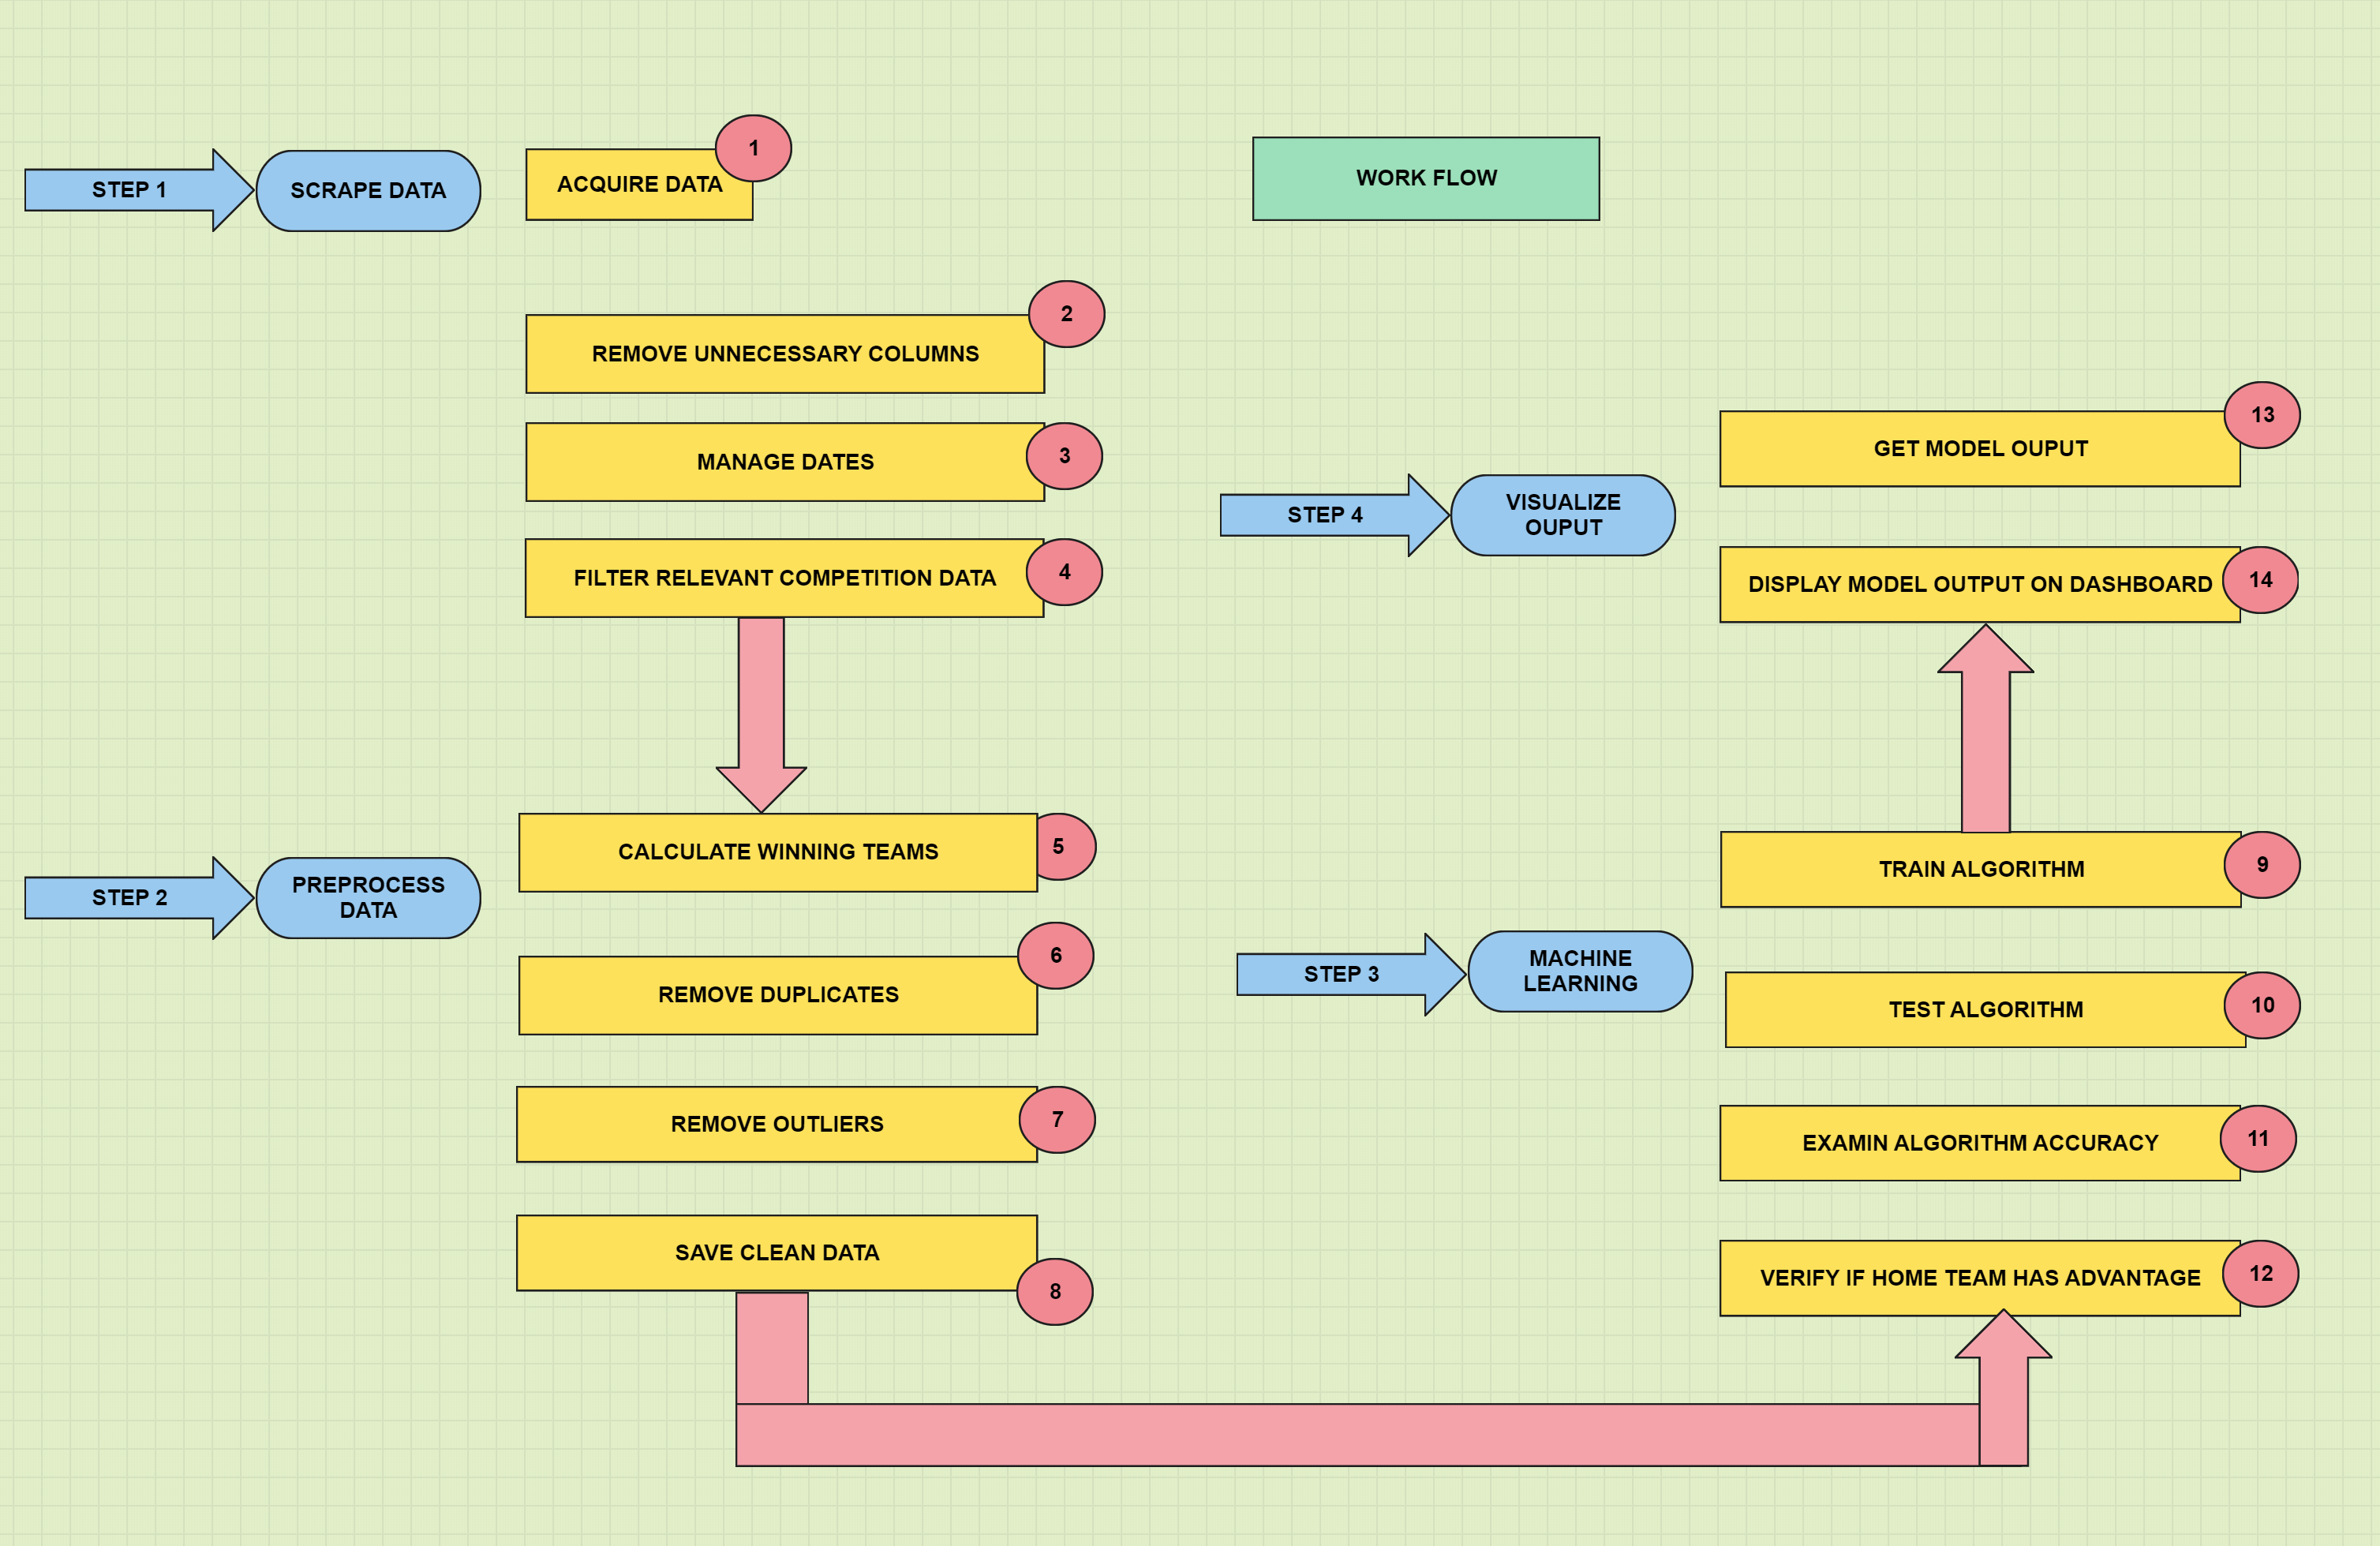

---

**REFERENCES**

---

For more information about the datasets used in this notebook, read the full documentation through the following links;

**DOCUMENT 1**: [GITHUB DATA](https://github.com/martj42/international_results)

**DOCUMENT 2**: [KAGGLE DATA](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv)

**TO DO LIST**

---

1. Train Model. ✅
2. Manage Oversampling. ✅
3. Peform GridSearch. ✅
4. Peform Cross-Validation. ✅
5. Check Data Description. ✅
6. Test Model Accuracy. ✅
7. Forecast Future Results. ✅
8. Create Data Time Frame. ✅
9. Load Teams Within Data Time Frame. ✅
10. Drop Teams With Inconsistent Data. ✅
11. Create Widgets to Display Data. ✅
12. Display Team Data With Widgets. ✅

---

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import joblib, os, warnings
import plotly.express as px
import ipywidgets as widgets
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import display
from datetime import datetime, timedelta
from imblearn.over_sampling import SMOTE
from ipywidgets import GridBox, Layout, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [2]:
data = pd.read_csv('Data/clean-data/clean-data.csv')
data = data.drop(['Tournament'], axis=1)
data.shape

(379, 10)

In [3]:
label_encoder = LabelEncoder()
data['HomeTeamLabel'] = label_encoder.fit_transform(data['HomeTeam'])
print(label_encoder.classes_)
data['AwayTeamLabel'] = label_encoder.fit_transform(data['AwayTeam'])
print(label_encoder.classes_)
data['CityVenue'] = label_encoder.fit_transform(data['CityVenue'])
print(label_encoder.classes_)
data['CountryVenue'] = label_encoder.fit_transform(data['CountryVenue'])
print(label_encoder.classes_)
data['VenueNeutrality'] = label_encoder.fit_transform(data['VenueNeutrality'])
print(label_encoder.classes_)

['Albania' 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Czech Republic'
 'Czechoslovakia' 'Denmark' 'England' 'Finland' 'France' 'Georgia'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Italy' 'Latvia' 'Netherlands'
 'Northern Ireland' 'Norway' 'Poland' 'Portugal' 'Republic of Ireland'
 'Romania' 'Russia' 'Scotland' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'Wales' 'Yugoslavia']
['Albania' 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Czech Republic'
 'Czechoslovakia' 'Denmark' 'England' 'Finland' 'France' 'Georgia'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Italy' 'Latvia' 'Netherlands'
 'North Macedonia' 'Northern Ireland' 'Norway' 'Poland' 'Portugal'
 'Republic of Ireland' 'Romania' 'Russia' 'Scotland' 'Serbia' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'Wales'
 'Yugoslavia']
['Amsterdam' 'Antwerp' 'Arnhem' 'Aveiro' 'Baku' 'Barcelona' 'Basel'
 'Belgrade' 'Berlin' 'Berne' 'Birmingham' 'Bordeaux' 'Braga' 'Bruges'
 'Brussels' 'Buch

In [4]:
output_path = 'Data/model-data/model-data.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
data.to_csv(output_path, index=False)
data.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,GoalDifference,FTR,CityVenue,CountryVenue,VenueNeutrality,HomeTeamLabel,AwayTeamLabel
0,2024-07-01,Portugal,Slovenia,0.0,0.0,0.0,1,28,6,1,22,30
1,2024-07-01,France,Belgium,1.0,0.0,1.0,2,24,6,1,10,2
2,2024-06-30,England,Slovakia,2.0,1.0,1.0,2,31,6,1,8,29
3,2024-06-30,Spain,Georgia,4.0,1.0,3.0,2,20,6,1,30,11
4,2024-06-29,Germany,Denmark,2.0,0.0,2.0,2,23,6,0,12,7


In [5]:
warnings.filterwarnings('ignore')
data = pd.read_csv('Data/model-data/model-data.csv')

In [6]:
X = data[['HomeTeamLabel', 'AwayTeamLabel', 'FTHG', 'FTAG', 'GoalDifference', 'CityVenue', 'CountryVenue', 'VenueNeutrality']]
y = data['FTR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

param_grid = {'C': [0.1, 1, 10]}
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

accuracy = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=5).mean() * 100
print("Accuracy: {:.2f}%".format(accuracy))
joblib.dump(grid_search.best_estimator_, 'Model/model.pkl')

Accuracy: 90.00%


['Model/model.pkl']

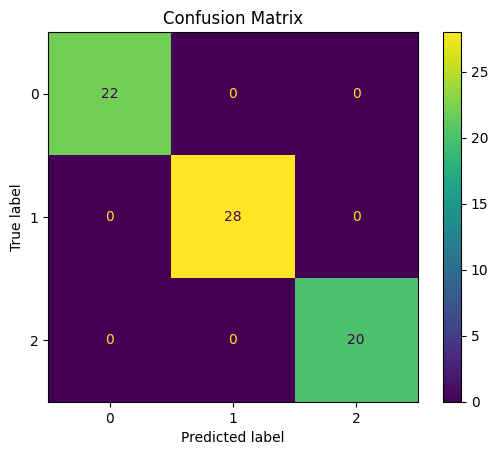

In [7]:
y_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [8]:
model = joblib.load('Model/model.pkl')
future_data1 = pd.read_csv('Data/model-data/model-data.csv')
future_data2 = pd.read_csv('Data/clean-data/clean-data.csv')
prediction_features = ['HomeTeamLabel', 'AwayTeamLabel', 'FTHG', 'FTAG', 'GoalDifference', 'CityVenue', 'CountryVenue', 'VenueNeutrality']
future_data = future_data1[prediction_features]
predictions = model.predict(future_data)

In [9]:
future_data['Winner'] = predictions

team_names = future_data1.merge(
    pd.DataFrame(future_data.index),
    left_index=True,
    right_index=True
)[['Date', 'HomeTeam', 'AwayTeam']]

future_data.loc[future_data['Winner'] == 0, 'Winner'] = team_names['AwayTeam']
future_data.loc[future_data['Winner'] == 2, 'Winner'] = team_names['HomeTeam']
future_data.loc[future_data['Winner'] == 1, 'Winner'] = 'Draw'

output = pd.concat([team_names, future_data], axis=1)
column_order = ['Date', 'HomeTeamLabel', 'HomeTeam', 'FTHG', 'FTAG', 'AwayTeam', 'AwayTeamLabel', 'Winner']
output = output[column_order]
output.head(5)

,Date,HomeTeamLabel,HomeTeam,FTHG,FTAG,AwayTeam,AwayTeamLabel,Winner
0,2024-07-01,22,Portugal,0.0,0.0,Slovenia,30,Draw
1,2024-07-01,10,France,1.0,0.0,Belgium,2,France
2,2024-06-30,8,England,2.0,1.0,Slovakia,29,England
3,2024-06-30,30,Spain,4.0,1.0,Georgia,11,Spain
4,2024-06-29,12,Germany,2.0,0.0,Denmark,7,Germany


In [10]:
winner_counts = future_data.loc[future_data['Winner'] != 'Draw', 'Winner'].value_counts()
all_teams = pd.unique(future_data['Winner'])
team_counts = pd.DataFrame({'Team': winner_counts.index, 'Wins': winner_counts.values})
team_counts = team_counts.sort_values('Wins', ascending=False)
team_counts.index = range(1, len(team_counts) + 1)
total_appearances = output['HomeTeam'].value_counts() + output['AwayTeam'].value_counts()
team_counts['Appearances'] = total_appearances[team_counts['Team']].values
team_counts['Win Rate (%)'] = round((team_counts['Wins'] / team_counts['Appearances']) * 100, 2)
max_appearances = team_counts['Appearances'].max()
team_counts['Weighted Win Rate (%)'] = round(((team_counts['Wins'] / team_counts['Appearances']) * (team_counts['Appearances'] / max_appearances)) * 100, 2)
team_counts = team_counts.sort_values('Weighted Win Rate (%)', ascending=False)
team_counts.index = range(1, len(team_counts) + 1)
team_counts.head(5)

,Team,Wins,Appearances,Win Rate (%),Weighted Win Rate (%)
1,Germany,30,57.0,52.63,52.63
2,Spain,25,50.0,50.00,43.86
3,France,23,47.0,48.94,40.35
4,Italy,22,49.0,44.90,38.60
5,Netherlands,21,42.0,50.00,36.84


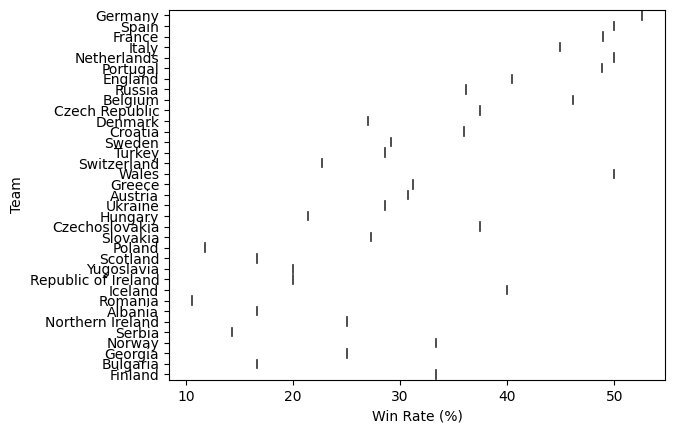

In [11]:
team_column = team_counts.get('Team')
if team_column is not None:
    sns.violinplot(team_counts, x='Win Rate (%)', y='Team', inner='stick', palette='Dark2')
else:
    print("The 'Team' column is not present in the data DataFrame.")

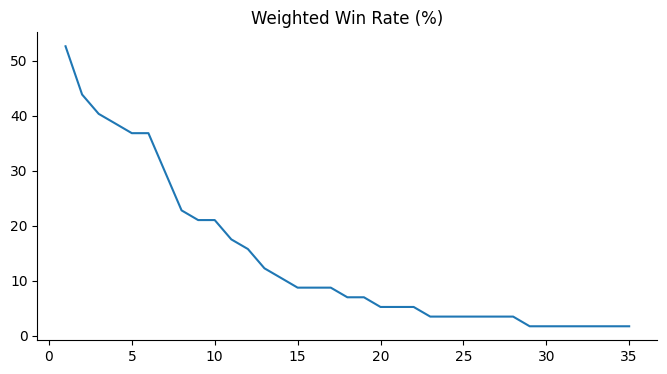

In [12]:
team_counts['Weighted Win Rate (%)'].plot(kind='line', figsize=(8, 4), title='Weighted Win Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

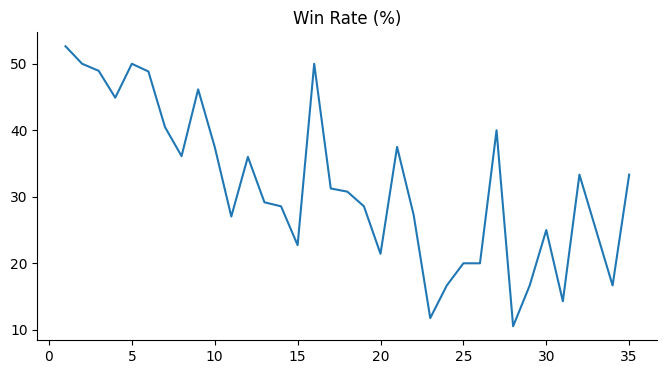

In [13]:
team_counts['Win Rate (%)'].plot(kind='line', figsize=(8, 4), title='Win Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

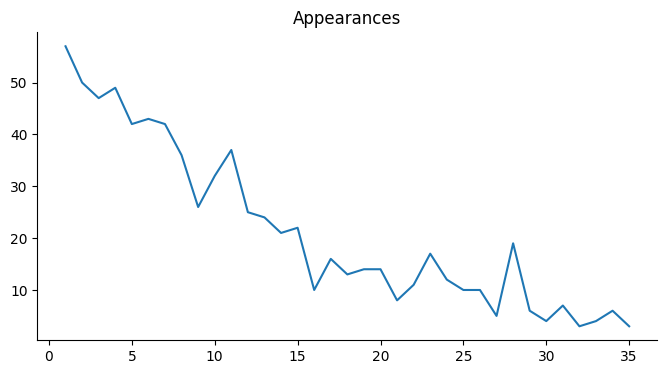

In [14]:
team_counts['Appearances'].plot(kind='line', figsize=(8, 4), title='Appearances')
plt.gca().spines[['top', 'right']].set_visible(False)

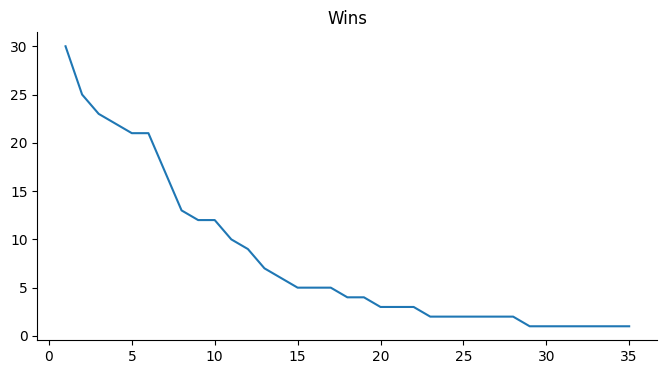

In [15]:
team_counts['Wins'].plot(kind='line', figsize=(8, 4), title='Wins')
plt.gca().spines[['top', 'right']].set_visible(False)

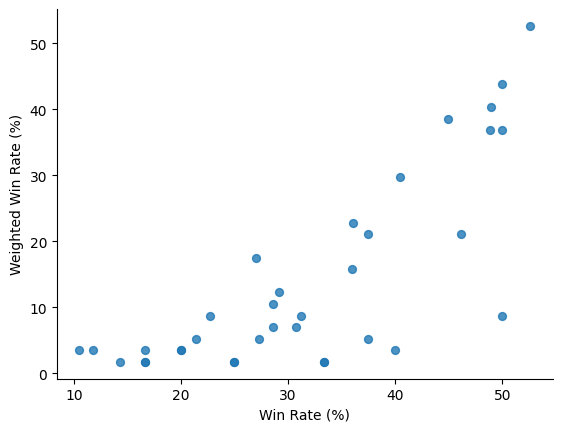

In [16]:
team_counts.plot(kind='scatter', x='Win Rate (%)', y='Weighted Win Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

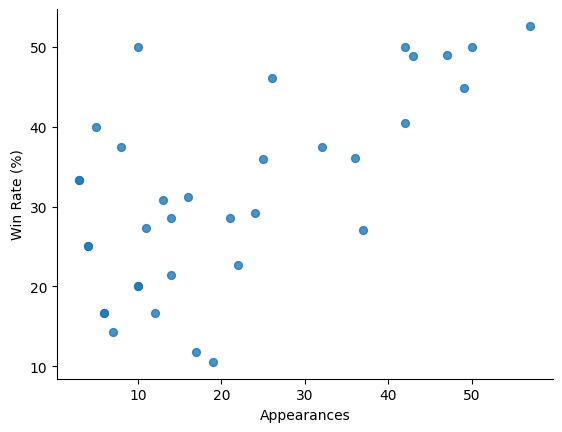

In [17]:
team_counts.plot(kind='scatter', x='Appearances', y='Win Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

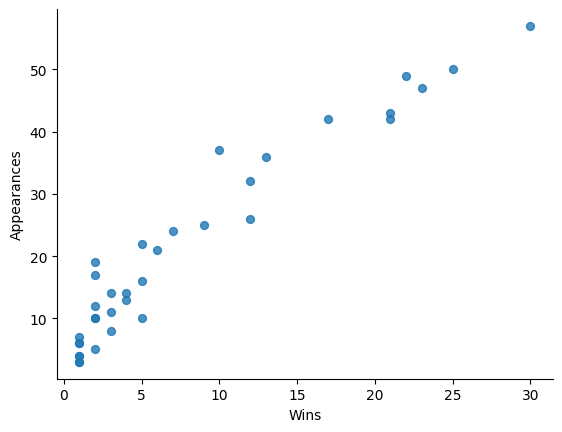

In [18]:
team_counts.plot(kind='scatter', x='Wins', y='Appearances', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

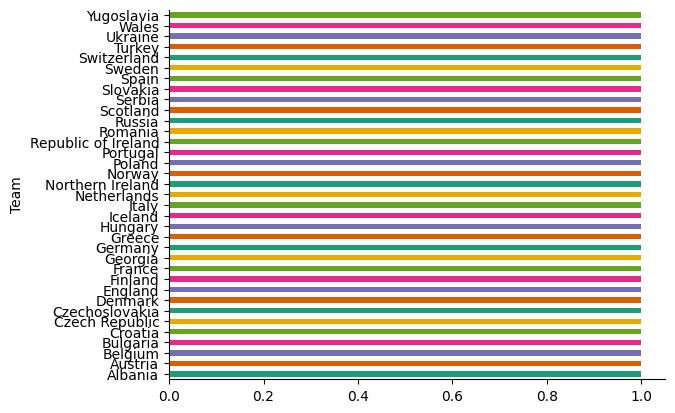

In [19]:
team_counts.groupby('Team').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

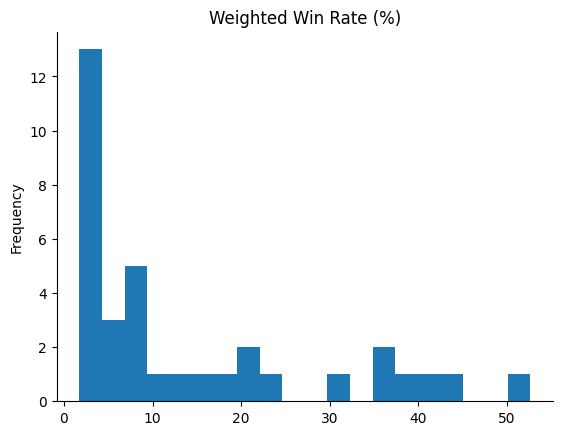

In [20]:
team_counts['Weighted Win Rate (%)'].plot(kind='hist', bins=20, title='Weighted Win Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

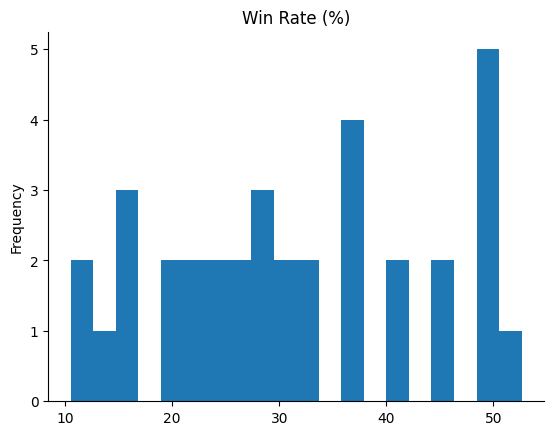

In [21]:
team_counts['Win Rate (%)'].plot(kind='hist', bins=20, title='Win Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

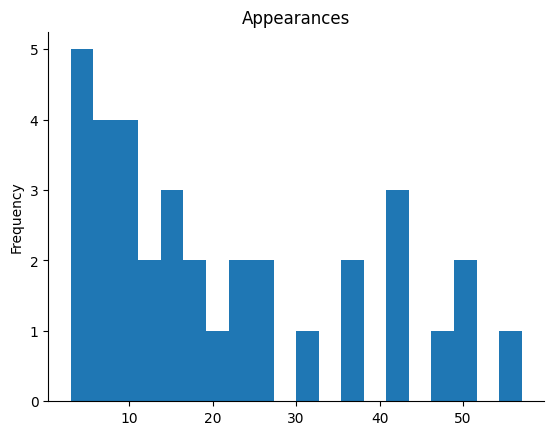

In [22]:
team_counts['Appearances'].plot(kind='hist', bins=20, title='Appearances')
plt.gca().spines[['top', 'right',]].set_visible(False)

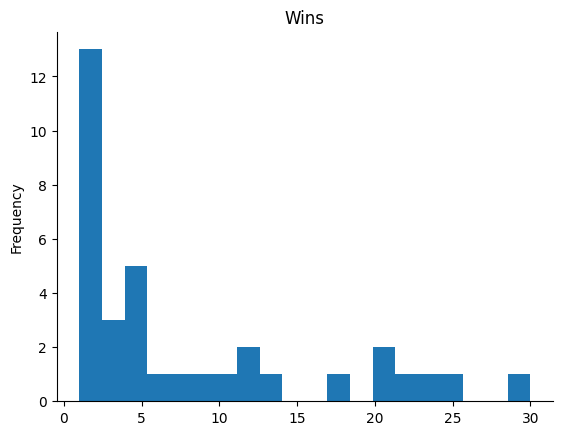

In [23]:
team_counts['Wins'].plot(kind='hist', bins=20, title='Wins')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
model = AdaBoostRegressor()
years = 30
start_date = datetime.now().replace(day=1, month=1) + timedelta(days=365)
end_date = datetime.strptime(output['Date'].max(), '%Y-%m-%d') + timedelta(days=365 * years)
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
forecast = pd.DataFrame(index=date_range)

In [25]:
for team in team_counts['Team']:
    historical_data = output.loc[(output['HomeTeam'] == team) | (output['AwayTeam'] == team)]
    historical_data['Date'] = pd.to_datetime(historical_data['Date'])
    historical_data = historical_data.set_index('Date')
    historical_data = historical_data.resample('MS')['Winner'].apply(lambda x: (x == team).sum())
    if len(historical_data) > 1:
        X = pd.DataFrame({'ones': 1, 'x': range(len(historical_data))})
        y = historical_data.values
        model = AdaBoostRegressor()
        model.fit(X, y)
        X_new = pd.DataFrame({'ones': 1, 'x': range(len(date_range))})
        forecast[team] = model.predict(X_new)
    else:
        forecast[team] = 0

In [26]:
years = list(range(2015, 2026))
start_year = years[0]
year_slider = widgets.SelectionSlider(
    options=years,
    value=years[0],
    description='Year:',
    continuous_update=False
)
forecast_fig = go.FigureWidget()
team_wins_fig = go.FigureWidget()
top_countries_html = HTML()

In [27]:
def update_dashboard(year):
    end_date = start_date + timedelta(days=365 * (year - start_year))
    forecast_filtered = forecast.loc[forecast.index <= end_date]
    total_wins = forecast_filtered.sum()
    team_wins = pd.DataFrame({'Team': total_wins.index, 'Wins': total_wins.values})
    team_wins = team_wins.sort_values('Wins', ascending=False)
    team_wins.reset_index(drop=True, inplace=True)
    team_wins.index += 1
    forecast_fig.data = []
    excluded_teams = ['Iceland', 'Wales', 'Czech Republic']
    for col in forecast_filtered.columns:
        if col not in excluded_teams:
            forecast_fig.add_scatter(x=forecast_filtered.index, y=forecast_filtered[col], name=col)
    forecast_fig.update_layout(title='Forecasted Wins for Each Team')
    team_wins_fig.data = []
    team_wins_fig.add_scattergeo(locations=team_wins.loc[~team_wins['Team'].isin(excluded_teams), 'Team'], locationmode='country names',
                                 marker=dict(size=team_wins.loc[~team_wins['Team'].isin(excluded_teams), 'Wins'], sizemode='diameter', color=team_wins.loc[~team_wins['Team'].isin(excluded_teams), 'Wins'], colorscale='Viridis', showscale=True),
                                 text=team_wins.loc[~team_wins['Team'].isin(excluded_teams), 'Team'] + ': ' + team_wins.loc[~team_wins['Team'].isin(excluded_teams), 'Wins'].astype(str) + ' Wins', hoverinfo='text')
    team_wins_fig.update_layout(
        title='European Teams and Their Forecasted Wins',
        geo=dict(showframe=False, showcoastlines=False, projection_type='orthographic',
                 showcountries=True, showland=True, landcolor='rgb(243, 243, 243)',
                 showocean=True, oceancolor='rgb(10, 200, 255)'),
                 height=600, width=800
    )
    top_countries_html.value = '<h3>Top 5 Countries</h3><table style="width:100%;margin:auto;text-align:center"><tr style="background-color:darkblue;color:white"><th style="text-align:center">Rank</th><th style="text-align:center">Team</th><th style="text-align:center">Wins</th></tr>' + ''.join(['<tr><td style="text-align:center">{}</td><td style="text-align:center">{}</td><td style="text-align:center">{}</td></tr>'.format(rank,row['Team'],round(row['Wins'])) for rank,row in team_wins.loc[~team_wins['Team'].isin(excluded_teams)].head(5).iterrows()]) + '</table>'

dashboard = widgets.interactive_output(update_dashboard, {'year': year_slider})
display(year_slider, dashboard)
GridBox([top_countries_html,
         team_wins_fig,
         forecast_fig],
        layout=Layout(grid_template_columns='repeat(1, minmax(250px, 1fr))'))

SelectionSlider(continuous_update=False, description='Year:', options=(2015, 2016, 2017, 2018, 2019, 2020, 202…

Output()

GridBox(children=(HTML(value='<h3>Top 5 Countries</h3><table style="width:100%;margin:auto;text-align:center">…